<a href="https://colab.research.google.com/github/sankardevisharath/amex-default-prediction/blob/master/notebooks/SGDClassifier_with_full_data_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir

files = listdir('/content/drive/MyDrive/amex-default-prediction/data/raw/')

In [2]:
import gc 

import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
cat_cols = ['D_63', 'D_64','B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']
TRAIN_LABELS_PATH = '/content/train_labels.csv'

In [4]:
!unzip /content/drive/MyDrive/amex-default-prediction/data/amex-default-prediction.zip \
 train_labels.csv

Archive:  /content/drive/MyDrive/amex-default-prediction/data/amex-default-prediction.zip
  inflating: train_labels.csv        


In [5]:
train_labels = pd.read_csv(TRAIN_LABELS_PATH)

In [6]:
def append_label(source_df):
  return pd.merge(left=source_df, right=train_labels, how='inner')

In [7]:
flag = True
X = pd.DataFrame()
Y = pd.DataFrame()

for f in files:
  print(f)
  df_tmp = pd.read_parquet('/content/drive/MyDrive/amex-default-prediction/data/raw/' + f)
  df_tmp = append_label(df_tmp)


  if(flag):
     enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
     df_tmp[['D_63', 'D_64']]=enc.fit(df_tmp[['D_63', 'D_64']])
     flag = False

  df_tmp[['D_63', 'D_64']]=enc.transform(df_tmp[['D_63', 'D_64']])
  df_tmp.fillna(0, inplace=True)

  X= X.append(df_tmp.loc[:, ~df_tmp.columns.isin(['customer_ID', 'S_2', 'target'])])

  Y = Y.append(df_tmp.loc[:, df_tmp.columns == 'target'])

  
  del df_tmp
  gc.collect()


data_2017-04.parquet
data_2017-05.parquet
data_2017-06.parquet
data_2017-03.parquet
data_2017-07.parquet
data_2017-08.parquet
data_2017-09.parquet
data_2017-10.parquet
data_2017-11.parquet
data_2017-12.parquet
data_2018-01.parquet
data_2018-02.parquet
data_2018-03.parquet


In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
gc.collect()

44

In [10]:
del X, Y

In [11]:
gc.collect()

44

In [12]:
clf = SGDClassifier(verbose=1000)

In [13]:
clf.fit(X_train, y_train.values.ravel())

-- Epoch 1
Norm: 4.93, NNZs: 188, Bias: -0.173496, T: 4425160, Avg. loss: 1.831394
Total training time: 3.59 seconds.
-- Epoch 2
Norm: 4.91, NNZs: 188, Bias: -0.031544, T: 8850320, Avg. loss: 0.503377
Total training time: 7.03 seconds.
-- Epoch 3
Norm: 10.44, NNZs: 188, Bias: 0.015538, T: 13275480, Avg. loss: 0.391585
Total training time: 10.35 seconds.
-- Epoch 4
Norm: 3.80, NNZs: 188, Bias: 0.000906, T: 17700640, Avg. loss: 0.400212
Total training time: 13.60 seconds.
-- Epoch 5
Norm: 3.84, NNZs: 188, Bias: -0.006603, T: 22125800, Avg. loss: 0.357378
Total training time: 16.87 seconds.
-- Epoch 6
Norm: 3.75, NNZs: 188, Bias: -0.009702, T: 26550960, Avg. loss: 0.346784
Total training time: 20.20 seconds.
-- Epoch 7
Norm: 3.76, NNZs: 188, Bias: 0.004650, T: 30976120, Avg. loss: 0.339298
Total training time: 23.61 seconds.
-- Epoch 8
Norm: 3.75, NNZs: 188, Bias: 0.000204, T: 35401280, Avg. loss: 0.335067
Total training time: 26.96 seconds.
-- Epoch 9
Norm: 3.76, NNZs: 188, Bias: 0.00912

SGDClassifier(verbose=1000)

In [14]:
clf.score(X_test, y_test)

0.8726709337778216

In [15]:
clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 1000,
 'warm_start': False}

In [16]:
y_pred = clf.predict(X_test)

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [18]:
tn, fp, fn, tp

(762305, 68825, 72038, 203123)

In [19]:
f1_score(y_test, y_pred)

0.7425321096892941

In [20]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9137    0.9172    0.9154    831130
           1     0.7469    0.7382    0.7425    275161

    accuracy                         0.8727   1106291
   macro avg     0.8303    0.8277    0.8290   1106291
weighted avg     0.8722    0.8727    0.8724   1106291



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


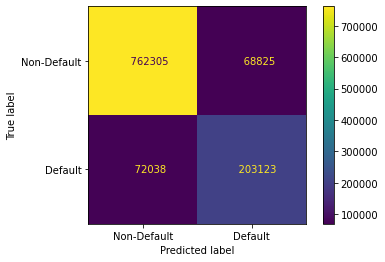

In [27]:
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Non-Default', 'Default'], values_format='10d')  
plt.show()